In [1]:
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

import utils
import autoencoders

In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


### Util functions

In [3]:
def plot_images(batch, nb_imgs):
    plt.figure(figsize=(20, 4))
    for i in range(nb_imgs):
        ax = plt.subplot(2, nb_imgs, i + 1)
        plt.imshow(batch[i].squeeze())
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

def plot_losses(losses, title='Evaluation losses'):
    plt.plot([i + 1 for i in range(len(losses))], losses, 'red')
    plt.title(title)
    plt.show()

def plot_results(mean_loss, batch_data, nb_imgs=10):
    (x, y, y_hat) = batch_data
    print(f'Mean loss: {round(mean_loss, 4)}')
    print('Input')
    plot_images(x, nb_imgs)
    print('Target')
    plot_images(y, nb_imgs)
    print('Generated')
    plot_images(y_hat, nb_imgs)

# LFW

In [4]:
(lfw_train, lfw_eval, lfw_test) = utils.load_dataset('lfw', batch_size=128)

  0%|          | 0/18983 [00:00<?, ?it/s]

In [5]:
conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', strides=2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2)
])

conv_decoder = tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(3, kernel_size=(3,3), activation='sigmoid', padding='same')
])

training start
epoch 1/20 - mean loss 0.0717
epoch 2/20 - mean loss 0.0488
epoch 3/20 - mean loss 0.0136
epoch 4/20 - mean loss 0.0087
epoch 5/20 - mean loss 0.0065
epoch 6/20 - mean loss 0.005
epoch 7/20 - mean loss 0.0043
epoch 8/20 - mean loss 0.0039
epoch 9/20 - mean loss 0.0037
epoch 10/20 - mean loss 0.0035
epoch 11/20 - mean loss 0.0034
epoch 12/20 - mean loss 0.0032
epoch 13/20 - mean loss 0.0031
epoch 14/20 - mean loss 0.003
epoch 15/20 - mean loss 0.0029
epoch 16/20 - mean loss 0.0028
epoch 17/20 - mean loss 0.0028
epoch 18/20 - mean loss 0.0027
epoch 19/20 - mean loss 0.0026
epoch 20/20 - mean loss 0.0025
training stop


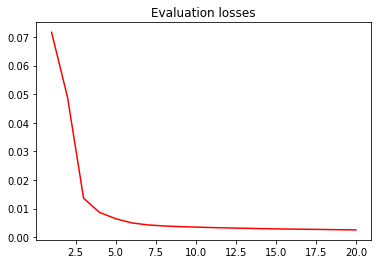

Mean loss: 0.0025
Input


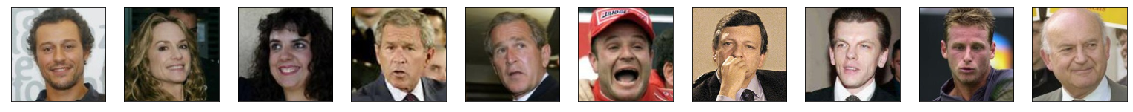

Target


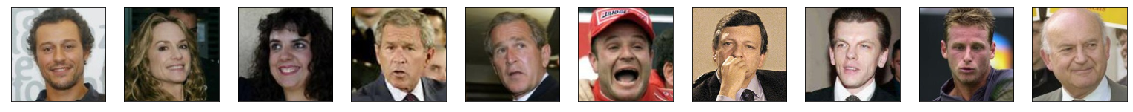

Generated


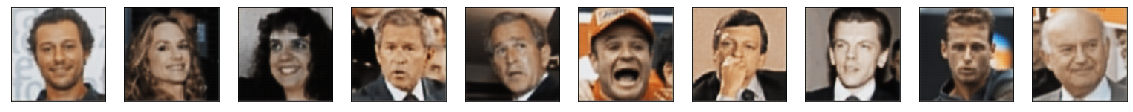

In [6]:
conv_lfw_autoencoder = autoencoders.Autoencoder(conv_encoder, conv_decoder)
eval_losses = conv_lfw_autoencoder.fit(lfw_train, lfw_eval, epochs=20)
plot_losses(eval_losses)
plot_results(*conv_lfw_autoencoder.evaluate(lfw_test))

# Blury LFW

In [7]:
(blury_lfw_train, blury_lfw_eval, blury_lfw_test) = utils.load_dataset('blury_lfw', batch_size=128)

  0%|          | 0/18983 [00:00<?, ?it/s]

In [8]:
conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', strides=2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2)
])

conv_decoder = tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(3, kernel_size=(3,3), activation='sigmoid', padding='same')
])

training start
epoch 1/20 - mean loss 0.0267
epoch 2/20 - mean loss 0.0095
epoch 3/20 - mean loss 0.0072
epoch 4/20 - mean loss 0.006
epoch 5/20 - mean loss 0.0055
epoch 6/20 - mean loss 0.0052
epoch 7/20 - mean loss 0.005
epoch 8/20 - mean loss 0.0048
epoch 9/20 - mean loss 0.0047
epoch 10/20 - mean loss 0.0046
epoch 11/20 - mean loss 0.0046
epoch 12/20 - mean loss 0.0045
epoch 13/20 - mean loss 0.0045
epoch 14/20 - mean loss 0.0044
epoch 15/20 - mean loss 0.0044
epoch 16/20 - mean loss 0.0043
epoch 17/20 - mean loss 0.0043
epoch 18/20 - mean loss 0.0043
epoch 19/20 - mean loss 0.0042
epoch 20/20 - mean loss 0.0042
training stop


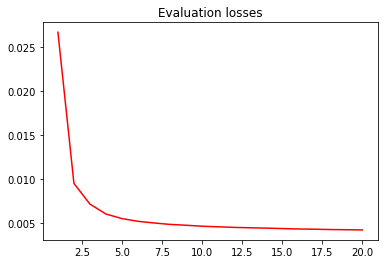

Mean loss: 0.0041
Input


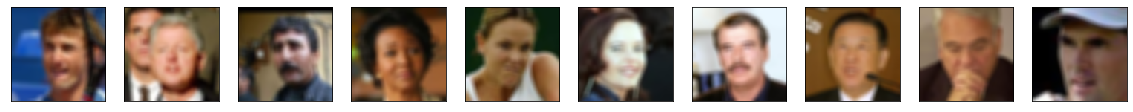

Target


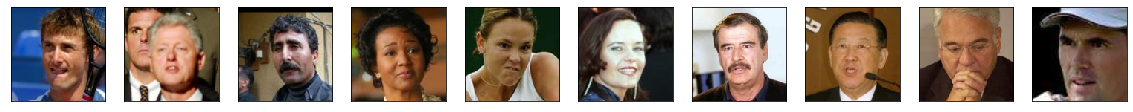

Generated


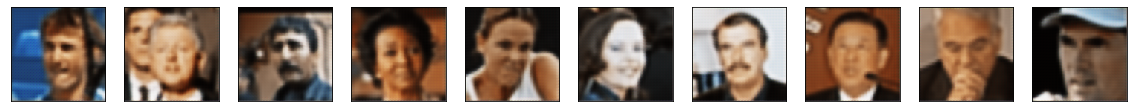

In [9]:
conv_blury_lfw_autoencoder = autoencoders.Autoencoder(conv_encoder, conv_decoder)
eval_losses = conv_blury_lfw_autoencoder.fit(blury_lfw_train, blury_lfw_eval, epochs=20)
plot_losses(eval_losses)
plot_results(*conv_blury_lfw_autoencoder.evaluate(blury_lfw_test))